<h1><center>Final Project:</center></h1>
<h1><center>Solving a Second Order Ordinary Differential Equation</center></h1>
<h2><center>Alisha Hodgin</center></h2>
<h4><center>University of Central Oklahoma, Department of Engineering and Physics</center></h4>
<h5><center>Computational Methods in Engineering, Fall 2021</center></h5>

## Importing Libraries for the Notebook & Defining Runge Kutta Constants

In [6]:
#IMPORT LIBRARIES
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

#CLASSICAL RK CONSTANTS
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2 
a4 = 1
b21 = 1./2
b31 = 0
b32 = 1./2
b41 = 0
b42 = 0
b43 = 1

<h1><center>Part I</center></h1>

<h3><center>$\large \ddot x + 2 \zeta \omega_n \dot x + {\omega}_n^2 x = \frac{F(t)}{m}$</center></h3>

<h5><center> Write python code that uses RK 4th order to solve the ODE above. For the first part of the project, you will assume F(t) is zero. Later you will be using F(t), so plan accordingly.Test your code with all three unforced cases - overdamping, critically damped, and underdamping. You will choose the values of $\omega_n$ and $\zeta$. You will need to demonstrate your code works over a range of time-step sizes for all cases. Code and graphics are required. You should calculate and verify that both $x(t)$ and $v(t)$ can reliably be calculated using Runge-Kutta by numerically and graphically comparing the analytical solutions and the calculated values from your RK program.</center></h5>

## Overdamped, Homogenous System

CONDITIONS: 


- $\zeta > \sqrt{\zeta^2 - 1}$


- $c > c_c$ therefore $\zeta > 1$


- $ \frac{F(t)}{m} = 0$

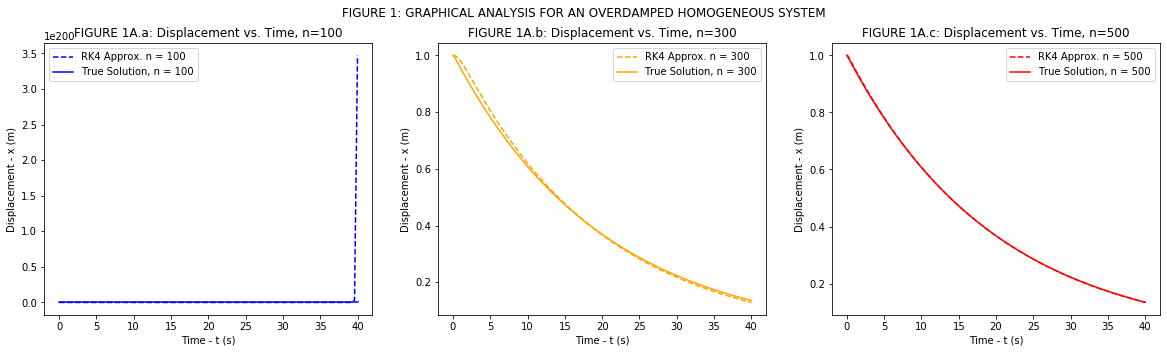

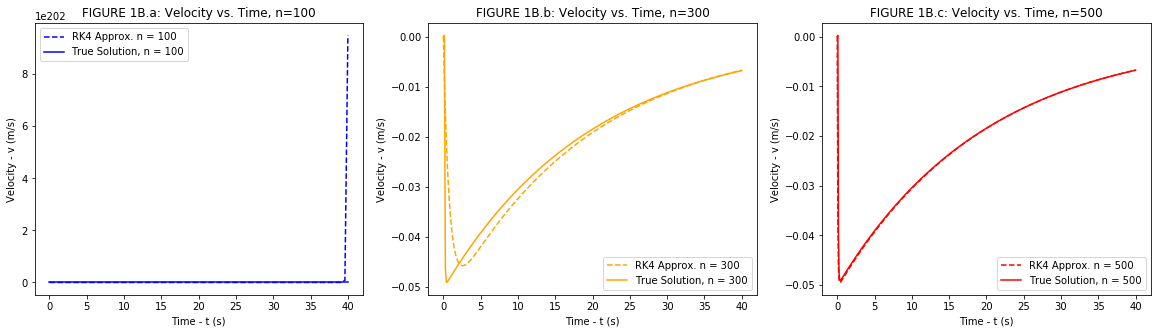





╒═════════╤═══════════════╤═══════════════╤════════════════════╤════════════════════╕
│         │   Max % Error │   Min % Error │   Max % Difference │   Min % Difference │
╞═════════╪═══════════════╪═══════════════╪════════════════════╪════════════════════╡
│ n = 100 │  2.53362e+203 │      0        │         200        │           0        │
├─────────┼───────────────┼───────────────┼────────────────────┼────────────────────┤
│ n = 300 │  4.838        │      0        │           4.95794  │           0        │
├─────────┼───────────────┼───────────────┼────────────────────┼────────────────────┤
│ n = 500 │  0.199734     │      0.199734 │           0.199934 │           0.199934 │
╘═════════╧═══════════════╧═══════════════╧════════════════════╧════════════════════╛
  TABLE 1: NUMERICAL ANALYSIS FOR AN OVERDAMPED HOMOGENOUS SYSTEM (position only)


In [7]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 10
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 0     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m

#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 300
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 500
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
     
###########################################################################################################################
#EXACT SOLUTION
###########################################################################################################################
#FUNCTIONS
#x_t and v_t defined for x(0) = 1 and v(0) = 0
def x_t(lam1, lam2, t):
    diff1 = lam1 - lam2
    diff2 = lam2 - lam1
    diff3 = lam2 - (2*lam1)
    return (diff3/diff2)*exp(lam1*t) + (lam1/diff1)*exp(lam2*t)
def v_t(lam1, lam2, t):
    diff1 = lam1 - lam2
    diff2 = lam2 - lam1
    diff3 = lam2 - (2*lam1)
    prod1 = lam1*diff3
    prod2 = lam2*lam1
    return (prod1/diff2)*exp(lam1*t) + (prod2/diff1)*exp(lam2*t)

lam1 = -wn*(zeta - wn*sqrt(pow(zeta,2) - 1))
lam2 = -wn*(zeta + wn*sqrt(pow(zeta,2) - 1))

#TIMESTEP 1
x_TS1 = np.zeros(n1+1)
v_TS1 = np.zeros(n1+1)
x_TS1[0] = xiv
v_TS1[0] = viv

for j in range(1,n1+1):
    x_TS1[j] = x_t(lam1,lam2,t1[j-1])
    v_TS1[j] = v_t(lam1,lam2,t1[j-1])
    
#TIMESTEP 2
x_TS2 = np.zeros(n2+1)
v_TS2 = np.zeros(n2+1)
x_TS2[0] = xiv
v_TS2[0] = viv

for j in range(1,n2+1):
    x_TS2[j] = x_t(lam1,lam2,t2[j-1])
    v_TS2[j] = v_t(lam1,lam2,t2[j-1])
    
#TIMESTEP 3
x_TS3 = np.zeros(n3+1)
v_TS3 = np.zeros(n3+1)
x_TS3[0] = xiv
v_TS3[0] = viv

for j in range(1,n3+1):
    x_TS3[j] = x_t(lam1,lam2,t3[j-1])
    v_TS3[j] = v_t(lam1,lam2,t3[j-1])
    
###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.figure(figsize = (20,5)) #(width,length)
plt.suptitle("FIGURE 1: GRAPHICAL ANALYSIS FOR AN OVERDAMPED HOMOGENEOUS SYSTEM\n\n\n\n")
plt.subplot(1,3,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,x_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 1A.a: Displacement vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "upper left")

plt.subplot(1,3,2)
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,x_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 1A.b: Displacement vs. Time, n=300",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 300","True Solution, n = 300"],loc = "upper right")

plt.subplot(1,3,3)
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,x_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 1A.c: Displacement vs. Time, n=500",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 500","True Solution, n = 500"],loc = "upper right")
plt.show()

#v vs t 
plt.figure(figsize = (20,5)) #(width,length)
plt.subplot(1,3,1)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,v_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 1B.a: Velocity vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "upper left")

plt.subplot(1,3,2)
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,v_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 1B.b: Velocity vs. Time, n=300",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 300","True Solution, n = 300"],loc = "lower right")

plt.subplot(1,3,3)
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,v_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 1B.c: Velocity vs. Time, n=500",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 500","True Solution, n = 500"],loc = "lower right")
plt.show()

###########################################################################################################################
#NUMERICAL ANALYSIS
###########################################################################################################################

#PERCENT ERROR & PERCENT DIFFERENCE
def per_err(aprx,TS): 
    return abs((aprx - TS)/TS)*100

def per_diff(aprx,TS): 
    return (abs(aprx - TS)/(.5*(aprx + TS)))*100

#CALCULATE FOR TIMESTEP 1
per_err_dt1 = np.zeros(n1+1)
per_diff_dt1 = np.zeros(n1+1)

for k in range(0,n1+1):
    per_err_dt1[k] = per_err(x1[k],x_TS1[k])
    per_diff_dt1[k] = per_diff(x1[k],x_TS1[k])

maxerr1 = max(per_err_dt1)
minerr1 = min(per_err_dt1)
maxdiff1 = max(per_diff_dt1)
mindiff1 = min(per_diff_dt1)

#CALCULATE FOR TIMESTEP 2
per_err_dt2 = np.zeros(n2+1)
per_diff_dt2 = np.zeros(n2+1)

for k in range(0,n2+1):
    per_err_dt2[k] = per_err(x2[k],x_TS2[k])
    per_diff_dt2[k] = per_diff(x2[k],x_TS2[k])

maxerr2 = max(per_err_dt2)
minerr2 = min(per_err_dt2)
maxdiff2 = max(per_diff_dt2)
mindiff2 = min(per_diff_dt2)

#CALCULATE FOR TIMESTEP 3
per_err_dt3 = np.zeros(n3+1)
per_diff_dt3 = np.zeros(n3+1)

for i in range(0,n3+1):
    per_err_dt3[i] = per_err(x3[k],x_TS3[k])
    per_diff_dt3[i] = per_diff(x3[k],x_TS3[k])

maxerr3 = max(per_err_dt3)
minerr3 = min(per_err_dt3)
maxdiff3 = max(per_diff_dt3)
mindiff3 = min(per_diff_dt3)
    
table_data = (["","Max % Error","Min % Error","Max % Difference","Min % Difference"],
              ["n = 100",maxerr1,minerr1,maxdiff1,mindiff1],
              ["n = 300",maxerr2,minerr2,maxdiff2,mindiff2],
              ["n = 500",maxerr3,minerr3,maxdiff3,mindiff3])

print("\n\n\n")
table = tabulate(table_data,headers='firstrow',tablefmt='fancy_grid')
print(table)
print("  TABLE 1: NUMERICAL ANALYSIS FOR AN OVERDAMPED HOMOGENOUS SYSTEM (position only)")


## Critically Damped, Homogenous System

CONDITIONS: 


- $\sqrt{\zeta^2 - 1} = 0$


- $c = c_c$ therefore $\zeta = 1$


- $ \frac{F(t)}{m} = 0$

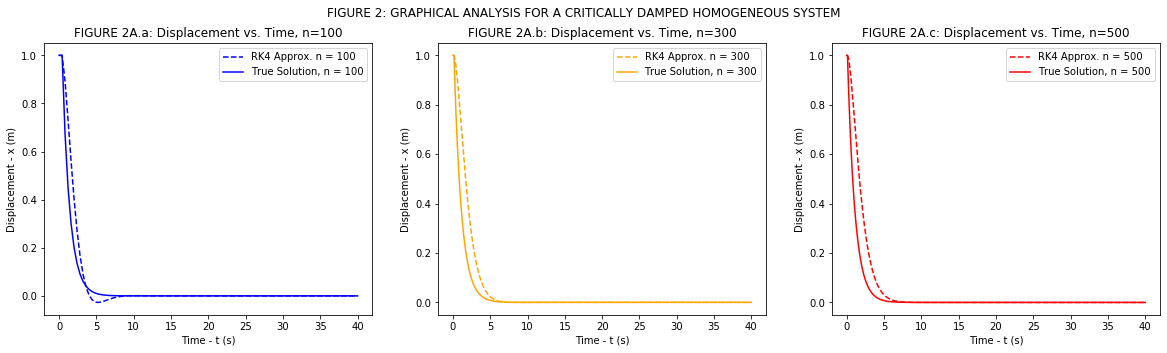

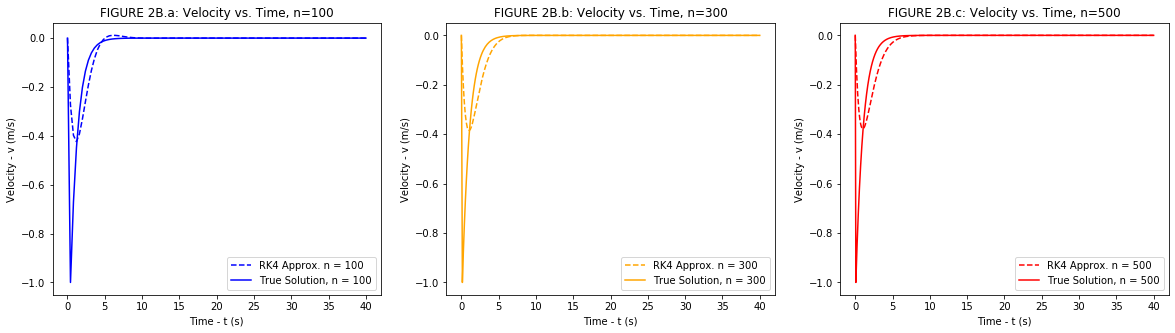

            NUMERICAL ANALYSIS FOR A CRITICALLY DAMPED HOMOGENOUS SYSTEM




╒═════════╤════════════════╤═══════════════╤════════════════════╤════════════════════╕
│         │    Max % Error │   Min % Error │   Max % Difference │   Min % Difference │
╞═════════╪════════════════╪═══════════════╪════════════════════╪════════════════════╡
│ n = 100 │    4.02895e+06 │         0     │           2409.2   │           -592.556 │
├─────────┼────────────────┼───────────────┼────────────────────┼────────────────────┤
│ n = 300 │ 4157.43        │         0     │           2113.54  │          -6914.14  │
├─────────┼────────────────┼───────────────┼────────────────────┼────────────────────┤
│ n = 500 │  615.714       │       615.714 │            150.963 │            150.963 │
╘═════════╧════════════════╧═══════════════╧════════════════════╧════════════════════╛
 TABLE 2: NUMERICAL ANALYSIS FOR A CRITICALLY DAMPED HOMOGENOUS SYSTEM (position only)


In [8]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 1
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 0     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 300
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 500
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    
###########################################################################################################################
#EXACT SOLUTION
###########################################################################################################################
#FUNCTIONS
#x_t and v_t defined for x(0) = 1 and v(0) = 0
def x_t(wn,t):
    return exp(-wn*t)
def v_t(wn,t):
    return -wn*exp(-wn*t)

lam1 = -wn*(zeta - wn*sqrt(pow(zeta,2) - 1))
lam2 = -wn*(zeta + wn*sqrt(pow(zeta,2) - 1))

#TIMESTEP 1
x_TS1 = np.zeros(n1+1)
v_TS1 = np.zeros(n1+1)
x_TS1[0] = xiv
v_TS1[0] = viv

for j in range(1,n1+1):
    x_TS1[j] = x_t(wn,t1[j-1])
    v_TS1[j] = v_t(wn,t1[j-1])
    
#TIMESTEP 2
x_TS2 = np.zeros(n2+1)
v_TS2 = np.zeros(n2+1)
x_TS2[0] = xiv
v_TS2[0] = viv

for j in range(1,n2+1):
    x_TS2[j] = x_t(wn,t2[j-1])
    v_TS2[j] = v_t(wn,t2[j-1])
    
#TIMESTEP 1
x_TS3 = np.zeros(n3+1)
v_TS3 = np.zeros(n3+1)
x_TS3[0] = xiv
v_TS3[0] = viv

for j in range(1,n3+1):
    x_TS3[j] = x_t(wn,t3[j-1])
    v_TS3[j] = v_t(wn,t3[j-1])

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.figure(figsize = (20,5)) #(width,length)
plt.suptitle("FIGURE 2: GRAPHICAL ANALYSIS FOR A CRITICALLY DAMPED HOMOGENEOUS SYSTEM\n\n\n\n")
plt.subplot(1,3,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,x_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 2A.a: Displacement vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "upper right")

plt.subplot(1,3,2)
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,x_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 2A.b: Displacement vs. Time, n=300",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 300","True Solution, n = 300"],loc = "upper right")

plt.subplot(1,3,3)
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,x_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 2A.c: Displacement vs. Time, n=500",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 500","True Solution, n = 500"],loc = "upper right")
plt.show()

#v vs t 
plt.figure(figsize = (20,5)) #(width,length)
plt.subplot(1,3,1)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,v_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 2B.a: Velocity vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "lower right")

plt.subplot(1,3,2)
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,v_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 2B.b: Velocity vs. Time, n=300",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 300","True Solution, n = 300"],loc = "lower right")

plt.subplot(1,3,3)
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,v_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 2B.c: Velocity vs. Time, n=500",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 500","True Solution, n = 500"],loc = "lower right")
plt.show()

###########################################################################################################################
#NUMERICAL ANALYSIS
###########################################################################################################################

#PERCENT ERROR & PERCENT DIFFERENCE
def per_err(aprx,TS): 
    return abs((aprx - TS)/TS)*100

def per_diff(aprx,TS): 
    return (abs(aprx - TS)/(.5*(aprx + TS)))*100

#CALCULATE FOR TIMESTEP 1
per_err_dt1 = np.zeros(n1+1)
per_diff_dt1 = np.zeros(n1+1)

for k in range(0,n1+1):
    per_err_dt1[k] = per_err(x1[k],x_TS1[k])
    per_diff_dt1[k] = per_diff(x1[k],x_TS1[k])

maxerr1 = max(per_err_dt1)
minerr1 = min(per_err_dt1)
maxdiff1 = max(per_diff_dt1)
mindiff1 = min(per_diff_dt1)

#CALCULATE FOR TIMESTEP 2
per_err_dt2 = np.zeros(n2+1)
per_diff_dt2 = np.zeros(n2+1)

for k in range(0,n2+1):
    per_err_dt2[k] = per_err(x2[k],x_TS2[k])
    per_diff_dt2[k] = per_diff(x2[k],x_TS2[k])

maxerr2 = max(per_err_dt2)
minerr2 = min(per_err_dt2)
maxdiff2 = max(per_diff_dt2)
mindiff2 = min(per_diff_dt2)

#CALCULATE FOR TIMESTEP 3
per_err_dt3 = np.zeros(n3+1)
per_diff_dt3 = np.zeros(n3+1)

for i in range(0,n3+1):
    per_err_dt3[i] = per_err(x3[k],x_TS3[k])
    per_diff_dt3[i] = per_diff(x3[k],x_TS3[k])

maxerr3 = max(per_err_dt3)
minerr3 = min(per_err_dt3)
maxdiff3 = max(per_diff_dt3)
mindiff3 = min(per_diff_dt3)

print("            NUMERICAL ANALYSIS FOR A CRITICALLY DAMPED HOMOGENOUS SYSTEM")    
table_data = (["","Max % Error","Min % Error","Max % Difference","Min % Difference"],
              ["n = 100",maxerr1,minerr1,maxdiff1,mindiff1],
              ["n = 300",maxerr2,minerr2,maxdiff2,mindiff2],
              ["n = 500",maxerr3,minerr3,maxdiff3,mindiff3])


print("\n\n\n")
table = tabulate(table_data,headers='firstrow',tablefmt='fancy_grid')
print(table)
print(" TABLE 2: NUMERICAL ANALYSIS FOR A CRITICALLY DAMPED HOMOGENOUS SYSTEM (position only)")

## Underdamped, Homogenous System

CONDITIONS: 


- $\sqrt{\zeta^2 - 1} < 1$


- $c < c_c$ therefore $\zeta < 1$


- $\omega_d = \omega_n\sqrt{1-\zeta^2}$ therefore $\lambda = -\zeta w_n \pm i\omega_d$


- $ \frac{F(t)}{m} = 0$

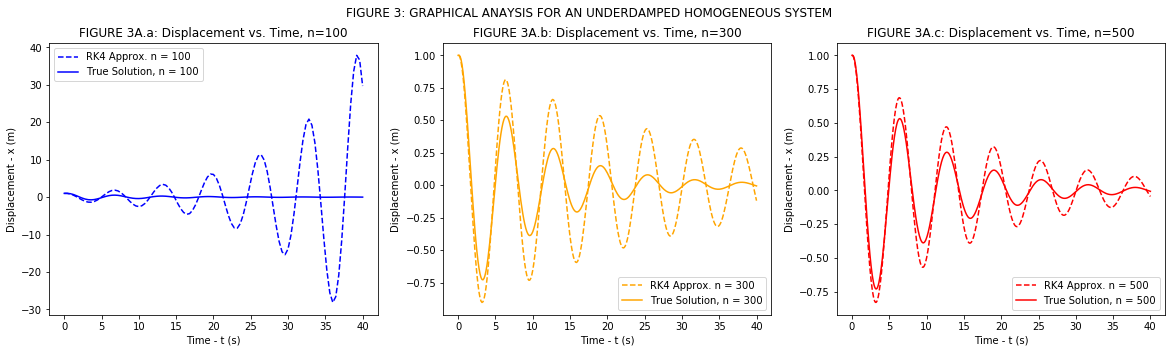

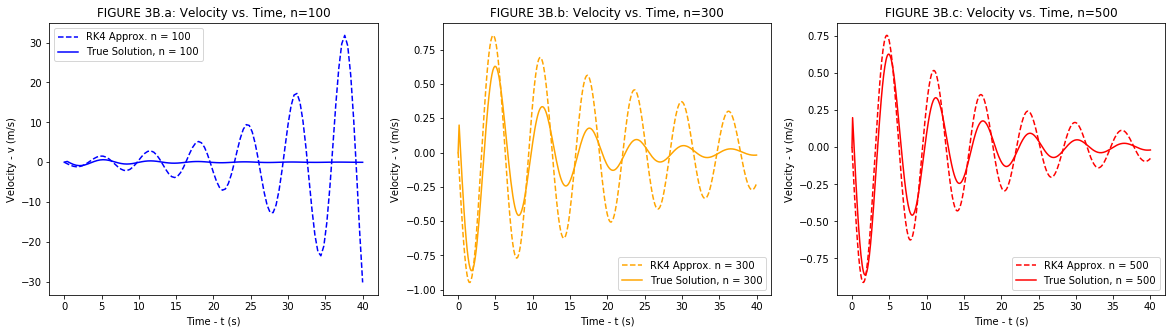





╒═════════╤═════════════════╤═══════════════╤════════════════════╤════════════════════╕
│         │     Max % Error │   Min % Error │   Max % Difference │   Min % Difference │
╞═════════╪═════════════════╪═══════════════╪════════════════════╪════════════════════╡
│ n = 100 │      7.2184e+06 │         0     │            230.105 │           -311.802 │
├─────────┼─────────────────┼───────────────┼────────────────────┼────────────────────┤
│ n = 300 │ 250896          │         0     │           1628.76  │           -454.283 │
├─────────┼─────────────────┼───────────────┼────────────────────┼────────────────────┤
│ n = 500 │    392.252      │       392.252 │            132.461 │            132.461 │
╘═════════╧═════════════════╧═══════════════╧════════════════════╧════════════════════╛
  TABLE 3: NUMERICAL ANALYSIS FOR AN UNDERDAMPED HOMOGENOUS SYSTEM (position only)


In [16]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = .1
wn = 1   #in rad/s
wd = wn*sqrt(1-pow(zeta,2)) #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 0     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 300
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 500
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    
###########################################################################################################################
#EXACT SOLUTION
###########################################################################################################################
#FUNCTIONS
#x_t and v_t defined for x(0) = 1 and v(0) = 0
def x_t(zeta,wn,wd,t):
    ex = -zeta*wn*t
    arg = wd*t
    frac = zeta*(wn/wd)
    return exp(ex)*(cos(arg) + (frac*sin(arg)))
def v_t(zeta,wn,wd,t):
    ex = -zeta*wn*t
    arg = wd*t
    frac = zeta*(wn/wd)
    p1 = (-wd*sin(arg)) + (zeta*wn*cos(arg))
    p2 = frac*((wd*cos(arg)) - (zeta*wn*sin(arg)))
    return exp(ex)*(p1 + p2)

#TIMESTEP 1
x_TS1 = np.zeros(n1+1)
v_TS1 = np.zeros(n1+1)
x_TS1[0] = xiv
v_TS1[0] = viv

for j in range(1,n1+1):
    x_TS1[j] = x_t(zeta,wn,wd,t1[j-1])
    v_TS1[j] = v_t(zeta,wn,wd,t1[j-1])
    
#TIMESTEP 2
x_TS2 = np.zeros(n2+1)
v_TS2 = np.zeros(n2+1)
x_TS2[0] = xiv
v_TS2[0] = viv

for j in range(1,n2+1):
    x_TS2[j] = x_t(zeta,wn,wd,t2[j-1])
    v_TS2[j] = v_t(zeta,wn,wd,t2[j-1])
    
#TIMESTEP 3
x_TS3 = np.zeros(n3+1)
v_TS3 = np.zeros(n3+1)
x_TS3[0] = xiv
v_TS3[0] = viv

for j in range(1,n3+1):
    x_TS3[j] = x_t(zeta,wn,wd,t3[j-1])
    v_TS3[j] = v_t(zeta,wn,wd,t3[j-1])

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.figure(figsize = (20,5)) #(width,length)
plt.suptitle("FIGURE 3: GRAPHICAL ANAYSIS FOR AN UNDERDAMPED HOMOGENEOUS SYSTEM\n\n\n\n")
plt.subplot(1,3,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,x_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 3A.a: Displacement vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "upper left")

plt.subplot(1,3,2)
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,x_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 3A.b: Displacement vs. Time, n=300",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 300","True Solution, n = 300"],loc = "lower right")

plt.subplot(1,3,3)
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,x_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 3A.c: Displacement vs. Time, n=500",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.legend(["RK4 Approx. n = 500","True Solution, n = 500"],loc = "lower right")
plt.show()

#v vs t 
plt.figure(figsize = (20,5)) #(width,length)
plt.subplot(1,3,1)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t1,v_TS1,c='blue',linestyle='solid') #true solution, dt1
plt.title("FIGURE 3B.a: Velocity vs. Time, n=100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","True Solution, n = 100"],loc = "upper left")

plt.subplot(1,3,2)
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t2,v_TS2,c='orange',linestyle='solid') #true solution, dt2
plt.title("FIGURE 3B.b: Velocity vs. Time, n=300",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 300","True Solution, n = 300"],loc = "lower right")

plt.subplot(1,3,3)
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.plot(t3,v_TS3,c='red',linestyle='solid') #true solution, dt3
plt.title("FIGURE 3B.c: Velocity vs. Time, n=500",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 500","True Solution, n = 500"],loc = "lower right")
plt.show()

###########################################################################################################################
#NUMERICAL ANALYSIS
###########################################################################################################################

#PERCENT ERROR & PERCENT DIFFERENCE
def per_err(aprx,TS): 
    return abs((aprx - TS)/TS)*100

def per_diff(aprx,TS): 
    return (abs(aprx - TS)/(.5*(aprx + TS)))*100

#CALCULATE FOR TIMESTEP 1
per_err_dt1 = np.zeros(n1+1)
per_diff_dt1 = np.zeros(n1+1)

for k in range(0,n1+1):
    per_err_dt1[k] = per_err(x1[k],x_TS1[k])
    per_diff_dt1[k] = per_diff(x1[k],x_TS1[k])

maxerr1 = max(per_err_dt1)
minerr1 = min(per_err_dt1)
maxdiff1 = max(per_diff_dt1)
mindiff1 = min(per_diff_dt1)

#CALCULATE FOR TIMESTEP 2
per_err_dt2 = np.zeros(n2+1)
per_diff_dt2 = np.zeros(n2+1)

for k in range(0,n2+1):
    per_err_dt2[k] = per_err(x2[k],x_TS2[k])
    per_diff_dt2[k] = per_diff(x2[k],x_TS2[k])

maxerr2 = max(per_err_dt2)
minerr2 = min(per_err_dt2)
maxdiff2 = max(per_diff_dt2)
mindiff2 = min(per_diff_dt2)

#CALCULATE FOR TIMESTEP 3
per_err_dt3 = np.zeros(n3+1)
per_diff_dt3 = np.zeros(n3+1)

for i in range(0,n3+1):
    per_err_dt3[i] = per_err(x3[k],x_TS3[k])
    per_diff_dt3[i] = per_diff(x3[k],x_TS3[k])

maxerr3 = max(per_err_dt3)
minerr3 = min(per_err_dt3)
maxdiff3 = max(per_diff_dt3)
mindiff3 = min(per_diff_dt3)
    
table_data = (["","Max % Error","Min % Error","Max % Difference","Min % Difference"],
              ["n = 100",maxerr1,minerr1,maxdiff1,mindiff1],
              ["n = 300",maxerr2,minerr2,maxdiff2,mindiff2],
              ["n = 500",maxerr3,minerr3,maxdiff3,mindiff3])

print("\n\n\n")
table = tabulate(table_data,headers='firstrow',tablefmt='fancy_grid')
print(table)
print("  TABLE 3: NUMERICAL ANALYSIS FOR AN UNDERDAMPED HOMOGENOUS SYSTEM (position only)")

<h1><center>Part II</center></h1>

<h5><center>Test your code using values of F(t)/m. You must choose at least three values, two of which may not be constant values of F(t) - i.e. there has to be some time variation of F. You should analyze the results of these tests. If there are known solutions for a given F(t) compare to those. In the end you need to convice the reader (Dr. Lemley) that your code is accurately calculating both x(t) and v(t) for each of these cases. Again, numerical and graphical evidence is required.</center></h5>

## Case #1, Constant F(t)

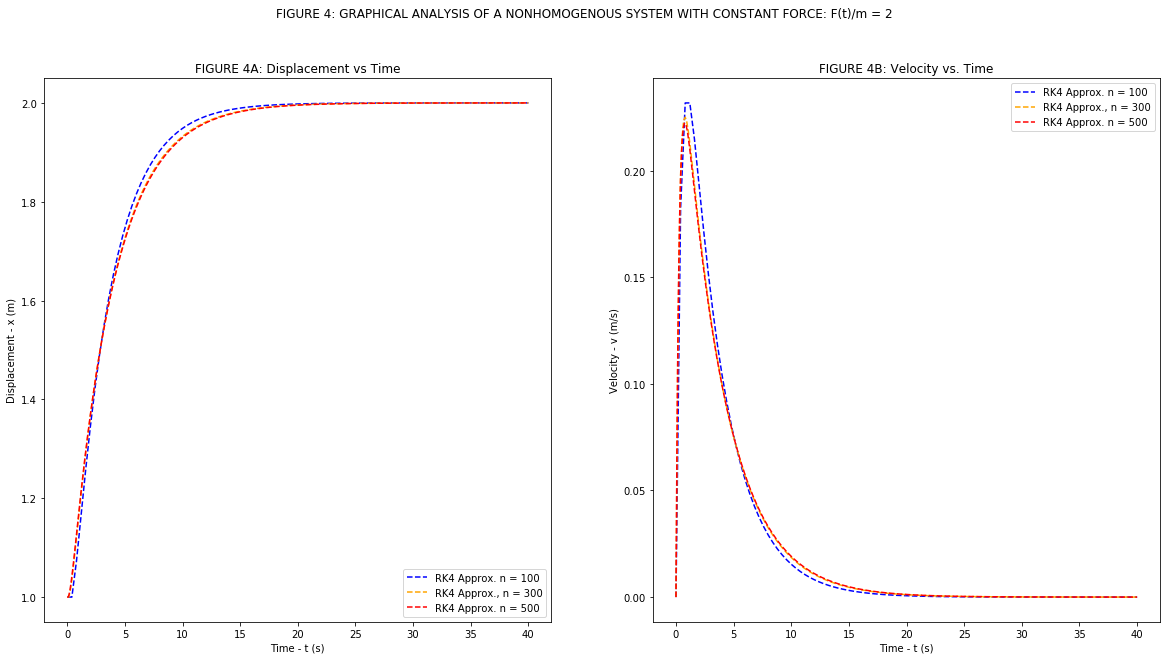

In [10]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 2
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 2     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 300
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 500
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.figure(figsize = (20,10)) #(width,length)
plt.suptitle("FIGURE 4: GRAPHICAL ANALYSIS OF A NONHOMOGENOUS SYSTEM WITH CONSTANT FORCE: F(t)/m = 2")
plt.subplot(1,2,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 4A: Displacement vs Time")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "lower right")

#v vs t 
plt.subplot(1,2,2)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 4B: Velocity vs. Time",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "upper right")
plt.show()

## Case #2, Linear F(t)

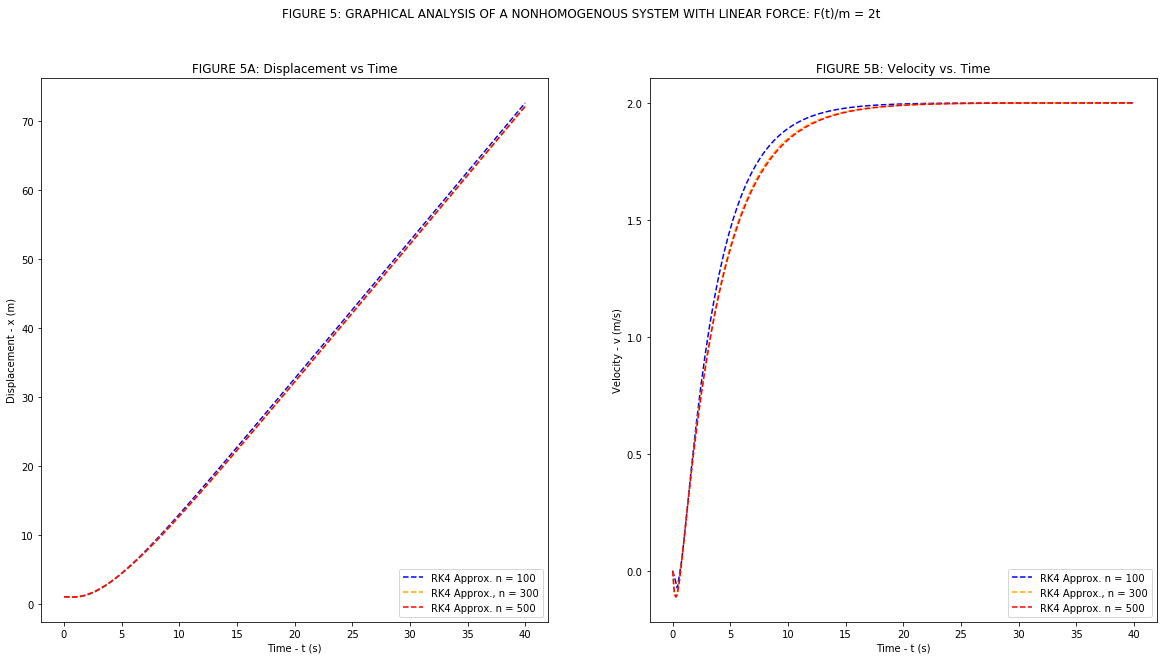

In [17]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 2
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 2*t     

#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 300
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 500
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.figure(figsize = (20,10)) #(width,length)
plt.suptitle("FIGURE 5: GRAPHICAL ANALYSIS OF A NONHOMOGENOUS SYSTEM WITH LINEAR FORCE: F(t)/m = 2t")
plt.subplot(1,2,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 5A: Displacement vs Time")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "lower right")

#v vs t 
plt.subplot(1,2,2)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 5B: Velocity vs. Time",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "lower right")
plt.show()


## Case #3, Nonlinear F(t)

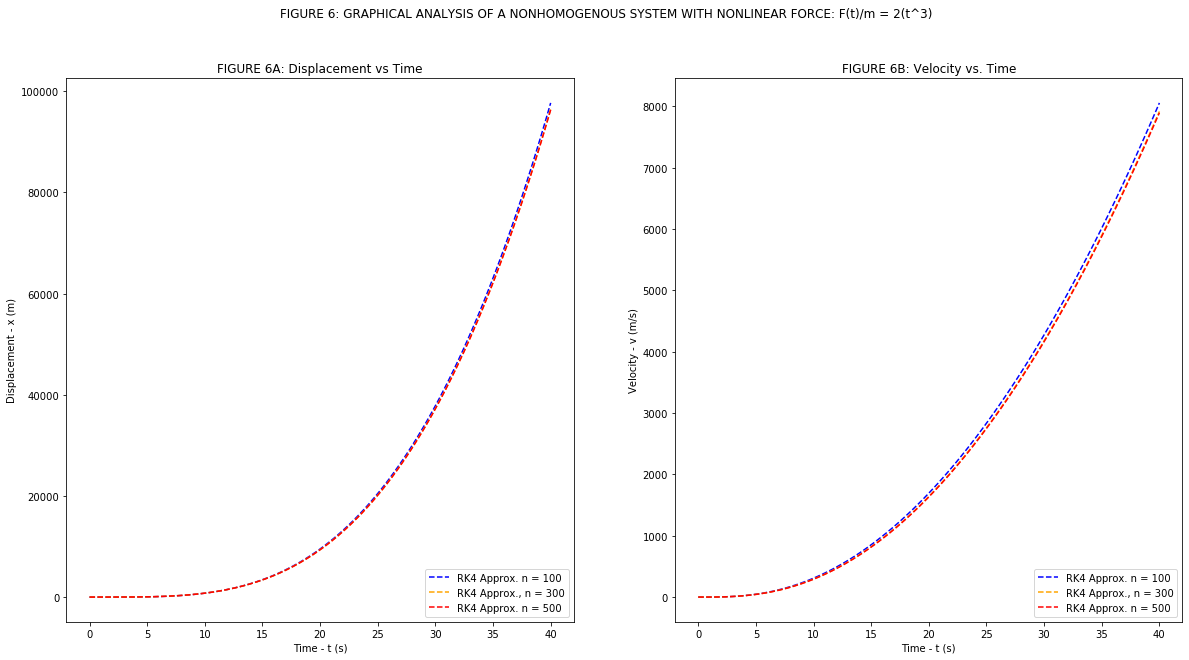

In [12]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 2
wn = 1   #in rad/s

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: 2*pow(t,3)
#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 300
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 500
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
#x vs t
plt.figure(figsize = (20,10)) #(width,length)
plt.suptitle("FIGURE 6: GRAPHICAL ANALYSIS OF A NONHOMOGENOUS SYSTEM WITH NONLINEAR FORCE: F(t)/m = 2(t^3)")
plt.subplot(1,2,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 6A: Displacement vs Time")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "lower right")

#v vs t 
plt.subplot(1,2,2)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 6B: Velocity vs. Time",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "lower right")
plt.show()


<h1><center>Part III</center></h1>

<h5><center>Finally test your code with $F(t)/m = Acos{\omega_f t}$ where you choose the value of $A$. You should vary $\omega_d$ over a range of values such that you can see instances where the oscillations (x(t)) are growing out of control over time (i.e. resonance). Graphically show how this occuring by displaying cases with different $\omega_f$ change the velocity and position over time.</center></h5>

## Case #1, Largest Value of $\omega_f$

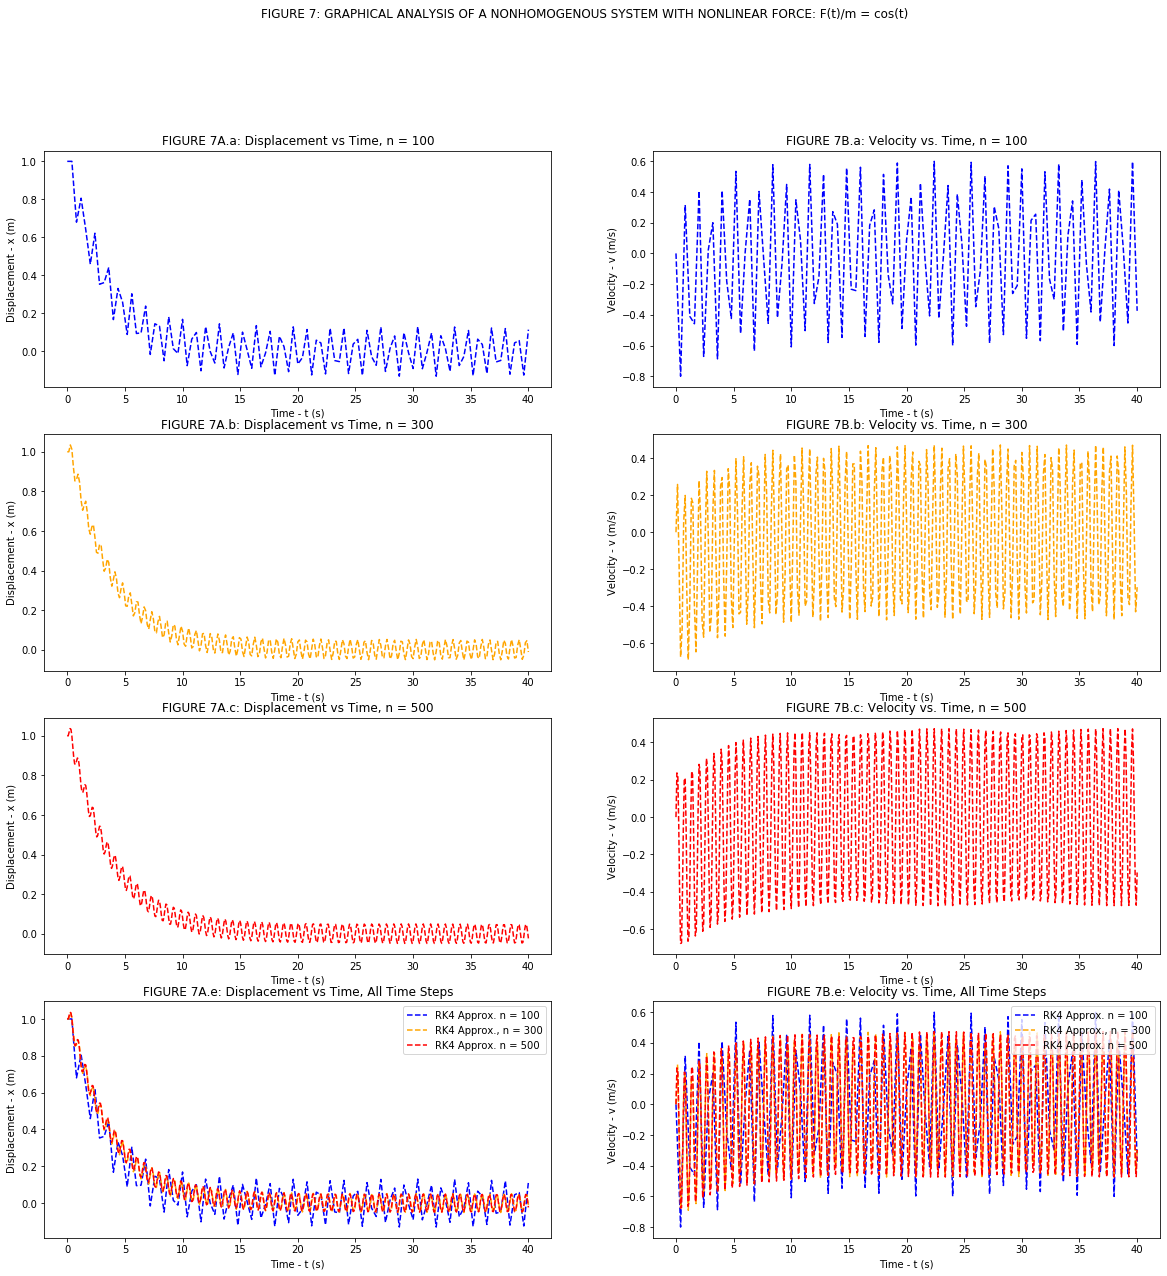

In [13]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 2
wn = 1   #in rad/s
A = 5
wf = pow(pi,2)

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: A*cos(wf*t)
#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 300
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 500
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
plt.figure(figsize = (20,20)) #(width,length)
plt.suptitle("FIGURE 7: GRAPHICAL ANALYSIS OF A NONHOMOGENOUS SYSTEM WITH NONLINEAR FORCE: F(t)/m = cos(t)")

plt.subplot(4,2,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 7A.a: Displacement vs Time, n = 100")

plt.subplot(4,2,2)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.title("FIGURE 7B.a: Velocity vs. Time, n = 100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")

plt.subplot(4,2,3)
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 7A.b: Displacement vs Time, n = 300")

plt.subplot(4,2,4)
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.title("FIGURE 7B.b: Velocity vs. Time, n = 300",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")

plt.subplot(4,2,5)
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 7A.c: Displacement vs Time, n = 500")

plt.subplot(4,2,6)
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 7B.c: Velocity vs. Time, n = 500",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")

plt.subplot(4,2,7)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 7A.e: Displacement vs Time, All Time Steps")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "upper right")

plt.subplot(4,2,8)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 7B.e: Velocity vs. Time, All Time Steps",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "upper right")
plt.show()


## Case #2, Middle Value of $\omega_f$

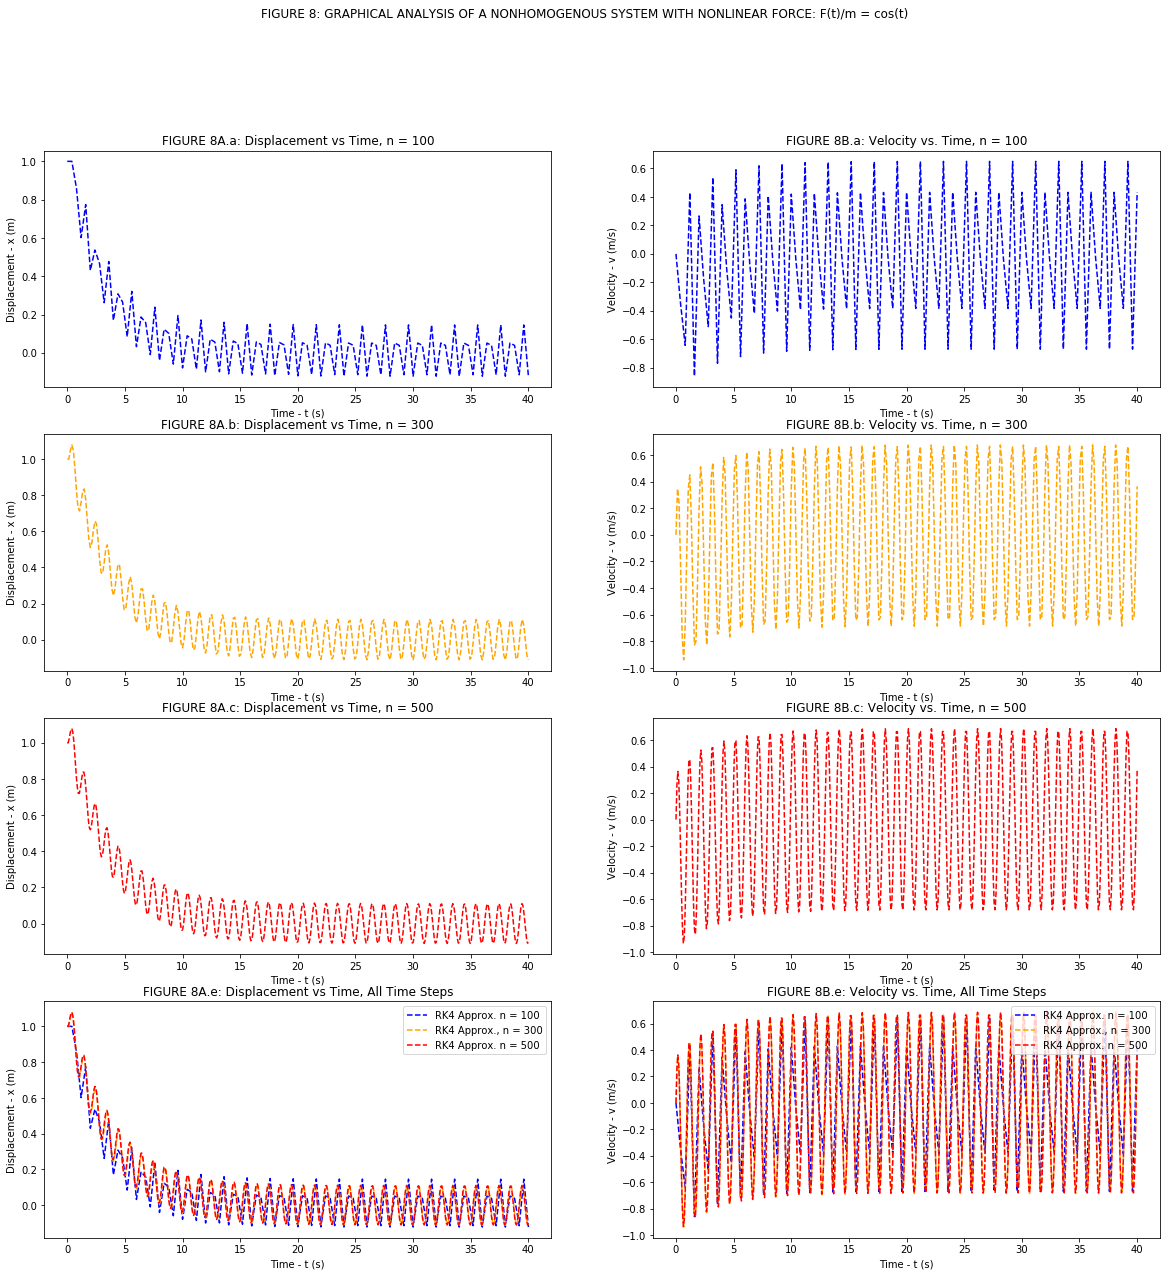

In [14]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 2
wn = 1   #in rad/s
A = 5
wf = 2*pi

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: A*cos(wf*t)
#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 300
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 500
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################

plt.figure(figsize = (20,20)) #(width,length)
plt.suptitle("FIGURE 8: GRAPHICAL ANALYSIS OF A NONHOMOGENOUS SYSTEM WITH NONLINEAR FORCE: F(t)/m = cos(t)")

plt.subplot(4,2,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 8A.a: Displacement vs Time, n = 100")

plt.subplot(4,2,2)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.title("FIGURE 8B.a: Velocity vs. Time, n = 100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")

plt.subplot(4,2,3)
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 8A.b: Displacement vs Time, n = 300")

plt.subplot(4,2,4)
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.title("FIGURE 8B.b: Velocity vs. Time, n = 300",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")

plt.subplot(4,2,5)
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 8A.c: Displacement vs Time, n = 500")

plt.subplot(4,2,6)
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 8B.c: Velocity vs. Time, n = 500",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")

plt.subplot(4,2,7)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 8A.e: Displacement vs Time, All Time Steps")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "upper right")

plt.subplot(4,2,8)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 8B.e: Velocity vs. Time, All Time Steps",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "upper right")
plt.show()


## Case #3, Lowest Value of $\omega_f$

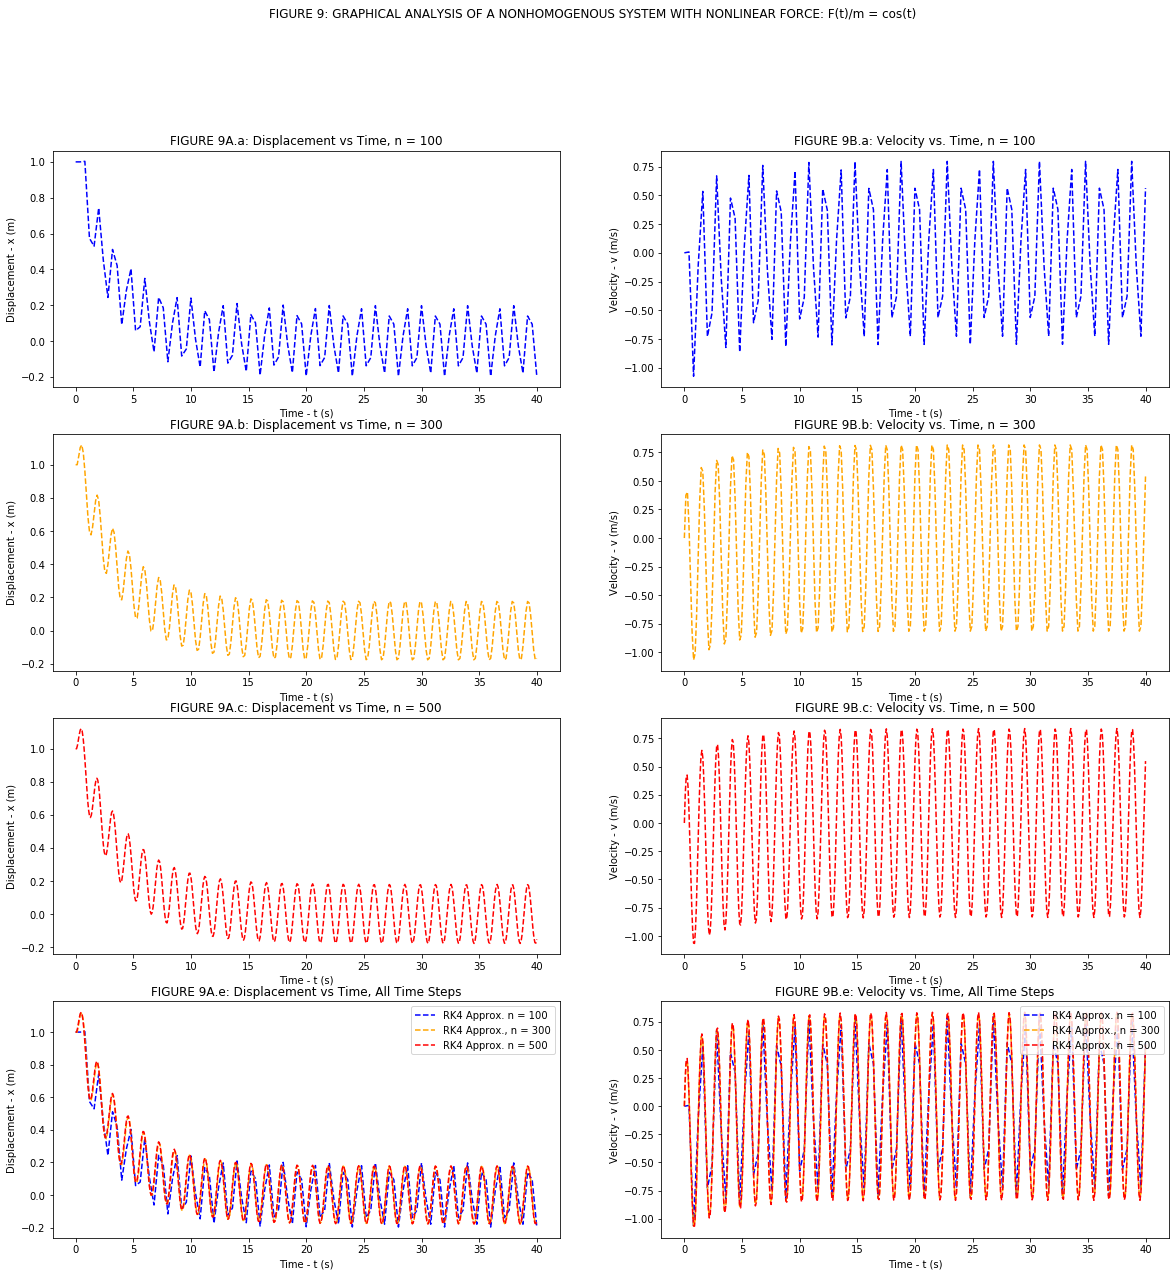

In [15]:
###########################################################################################################################
#APPROXIMATE SOLUTION
###########################################################################################################################
#SYSTEM CONSTANTS
zeta = 2
wn = 1   #in rad/s
A = 5
wf = (3*pi)/2

#LAMBDA FUNCTIONS
    #Note:
        #t is independent
        #x is dependent
        #v is dependent

#Fom dependent on t
Fom = lambda t: A*cos(wf*t)
#fx dependent on v
#dx/dt, gives x vs t
fx = lambda t,x,v: v

#fv dependent on v and x
    #only dependent on t because Fom is t-dependent
#dv/dt, gives v vs t
fv = lambda t,x,v: (Fom(t) - (2*zeta*wn*v) - (x*pow(wn,2)))


#RUNGE KUTTA FUNCTIONS
    #Note:
        #need RK function for each ODE
        #do not need RK function for F_over_m
        
#x is primary dependent variable, will change
#v is also dependent, but will not change for this function
def RK4_x(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*dt, xi+b21*K1*dt, vi)
    K3 = fx(ti+a3*dt, xi+b31*K1*dt+b32*K2*dt, vi)
    K4 = fx(ti+a4*dt, xi+b41*K1*dt+b42*K2*dt+b43*K3*dt, vi)
    xip1 = xi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return xip1

#v is primary dependent variable, will change
#x is also dependent, but will not change for this function
def RK4_v(ti,xi,vi,c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt):
    K1 = fv(ti,xi,vi)
    K2 = fv(ti+a2*dt, xi, vi+b21*K1*dt)
    K3 = fv(ti+a3*dt, xi, vi+b31*K1*dt+b32*K2*dt)
    K4 = fv(ti+a4*dt, xi, vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1 + c2*K2 + c3*K3 + c4*K4)*dt
    return vip1


#INITIAL CONDITIONS & TIME STEP
tiv = 0 #initial time, in s
tfv = 40 #final time, in s
xiv = 1 #initial position, in m
viv = 0 #initial velocity, in m/s

#TIMESTEP 1
n1 = 100  #number of steps
dt1 = (tfv-tiv)/n1 #step size, in s
t1 = np.zeros(n1+1)
x1 = np.zeros(n1+1)
v1 = np.zeros(n1+1)
t1[0] = tiv
x1[0] = xiv
v1[0] = viv
for i in range(1,n1+1):
    t1[i] = t1[i-1]+dt1
    x1[i] = RK4_x(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)
    v1[i] = RK4_v(t1[i-1],x1[i-1],v1[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt1)

#TIMESTEP 2
n2 = 300
dt2 = (tfv-tiv)/n2
t2 = np.zeros(n2+1)
x2 = np.zeros(n2+1)
v2 = np.zeros(n2+1)
t2[0] = tiv
x2[0] = xiv
v2[0] = viv
for i in range(1,n2+1):
    t2[i] = t2[i-1]+dt2
    x2[i] = RK4_x(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    v2[i] = RK4_v(t2[i-1],x2[i-1],v2[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt2)
    
#TIMESTEP 3
n3 = 500
dt3 = (tfv-tiv)/n3
t3 = np.zeros(n3+1)
x3 = np.zeros(n3+1)
v3 = np.zeros(n3+1)
t3[0] = tiv
x3[0] = xiv
v3[0] = viv
for i in range(1,n3+1):
    t3[i] = t3[i-1]+dt3
    x3[i] = RK4_x(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)
    v3[i] = RK4_v(t3[i-1],x3[i-1],v3[i-1],c1, c2, c3, c4, a2, a3, a4, b21, b31, b32, b41, b42, b43,dt3)

###########################################################################################################################
#GRAPHICAL ANALYSIS
###########################################################################################################################
plt.figure(figsize = (20,20)) #(width,length)
plt.suptitle("FIGURE 9: GRAPHICAL ANALYSIS OF A NONHOMOGENOUS SYSTEM WITH NONLINEAR FORCE: F(t)/m = cos(t)")

plt.subplot(4,2,1)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 9A.a: Displacement vs Time, n = 100")

plt.subplot(4,2,2)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.title("FIGURE 9B.a: Velocity vs. Time, n = 100",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")

plt.subplot(4,2,3)
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 9A.b: Displacement vs Time, n = 300")

plt.subplot(4,2,4)
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.title("FIGURE 9B.b: Velocity vs. Time, n = 300",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")

plt.subplot(4,2,5)
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 9A.c: Displacement vs Time, n = 500")

plt.subplot(4,2,6)
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 9B.c: Velocity vs. Time, n = 500",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")

plt.subplot(4,2,7)
plt.plot(t1,x1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,x2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,x3,c='red',linestyle='dashed') #rk approx., dt3
plt.xlabel("Time - t (s)")
plt.ylabel("Displacement - x (m)")
plt.title("FIGURE 9A.e: Displacement vs Time, All Time Steps")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "upper right")

plt.subplot(4,2,8)
plt.plot(t1,v1,c='blue',linestyle='dashed') #rk approx., dt1
plt.plot(t2,v2,c='orange',linestyle='dashed') #rk approx., dt2
plt.plot(t3,v3,c='red',linestyle='dashed') #rk approx., dt3
plt.title("FIGURE 9B.e: Velocity vs. Time, All Time Steps",loc="center")
plt.xlabel("Time - t (s)")
plt.ylabel("Velocity - v (m/s)")
plt.legend(["RK4 Approx. n = 100","RK4 Approx., n = 300","RK4 Approx. n = 500"],loc = "upper right")
plt.show()

<h1><center>Final Analysis</center></h1>


<b><u>*note: the numerical analysis was done for the position only</u></b>

<b><u>FOR PART I:</u></b>

For part I, the value of F(t)/m for the given differential equation was assumed to be zero. The unforced system was solved using a Runge Kutta 4 (RK4) approximation for three different damping conditions (overdamped, critically damped, underdamped), each evaluated at three different timestep sizes (100 steps, 300 steps, 500 steps). It was also solved with the calculated true solution to the equation. For each case, a graphical and numerical analysis was completed. For the numerical analysis, the percent difference and percent error were calculated between the true and approximated value for each step size and each damping condition; the maximum and minimum values were provided. For the graphical analysis, six graphs were provided for each damping condition. Three of the graphs demonstrate the change in position for each step size, and the other three demonstrate the change in velocity for each step size. 



<b>Overdamping Case</b>

The graphical analysis for the overdamping case can be found in Figure 1 (which is comprised of six smaller plots), and the corresponding numerical analysis can be found in Table 1. Figures 1A.a, 1A.b, and 1A.c show the relationship betwen the position of the oscillator over a time of forty seconds with steps of 100, 300, and 500 respectively. Similarly, the relationship between the velocity and the time is shown in Figures 1B.a, 1B.b, and 1B.c at the same respective timesteps. As the number of steps goes up, the RK4 approximation of the curve gradually gets closer to the curve representing the true solution, indicating that the more steps used in the approximation means a more accurate approximation. In fact, at 100 steps, the true solution doesn't even give the correct true solution curve in Figures 1A.a and 1B.a as it does at 300 and 500 steps (for the position and the velocity). This is also shown in Table 1 as the approximation with 100 steps has the highest maximum percent error and percent difference, while the 500 step approximation has the lowest maximum percent error and percent difference. 

<b>Critically Damping Case</b>

The graphical analysis for the critically damping case can be found in Figure 2, and the numerical analysis can be found in Table 2. Similar to the overdamping case, more steps indicates a more accurate approximation to the true solution curve. Differing from the overdamping case, the true solution curves at 100, 300, and 500 steps are all the same, as they are expected to be. Again, the 500 step approximation carries the lowest maximum percent error and percent difference, while the 100 step approximation carries the highest. 

<b>Underdamping Case</b>

The graphical analysis for the underdamping case can be found in Figure 3, and the numerical analysis can be found in Table 3. Again, graphically, the RK4 approximation begins to fit closer to the true solution as the step size is increased; however, again, there is a problem with the curves in Figures 3A.a and 3B.a at a step size of 100. Because the system is underdamped, it is expected that the position and velocity would oscillate rapidly and eventually die out as is depicted in Figures 3A.b, 3A.c, 3B.b, and 3B.c. At 100 steps, the approximation of the solution acutally seems to gain amplitude as time goes on, and the true solution does not oscillate at all. Numerically, the data trend aligns with the overdamped and critically damped cases where the smallest step size has the highest maximum percent error and difference, and the largest step size has the smallest maximum percent error and percent difference. 

Overall, the RK4 approximation code can be useful at a high step size, but it should be used with caution. At a step size of 100, the overdamped and underdamped cases did not provide graphical data that was expected from the cases, but the critically damped case did. This may indicate that RK4 can be used as an approximation for x(t) and v(t) of the given differential equation, but only with very high step sizes. Additionally, although a step size of 500 provided the lowest maximum percent error and percent difference, it was still a very large value that would not be good when using the code in a real life application. To improve this approximation, a larger step size or different approximation method should be used. 


<b>FOR PART II:</b>

For part II, F(t)/m was not assumed to be zero, and was actually varied for each case; therefore, the calculated approximation was for a forced system. For this part, the true solution for any of the three cases was unknown; so, the approximated values could not be graphically or numerically compared to a true solution. However, three different force cases were tested (constant, linear, nonlinear) at the same three step sizes as part I. The graphical analysis for the constant force, linear force, and nonlinear force is given in Figures 4, 5, and 6 respectively. Each figure displays two graphs, one for the relationship between the position and time and the other for the relationship between the velocity and time. The three time steps are shown together in each graph. Numercially, a percent error could not be found because there is no true solution, and a percent difference between the different time steps could also not be found as each case has a different number of values (a list of 100 values cannot be compared to a list of 300 or 500 values). 

In each case, the graphs of each timestep, for position and velocity, align very closely with one another. It was originally assumed that the approximations are correct at the higher step sizes as discussed in part I; however, becuase the systems are forced, oscillations were expected in Figures 4-6. The absence of the oscillations may be the manifestation of the high percent errors observed in part I, or it may be due to the values of $\zeta$ and $\omega_n$ that were used in the approximations. During experimentation, it was observed that a step size higher than 500 or lower than 100 did not affect the final result. 

<b>FOR PART III:</b>

Graphical results for part III can be found in Figures 7, 8, and 9. Each figure represents a different $\omega_f$ value used in calculating the approximation of the forced system. Again, three time steps were used at 100, 300, and 500, and each time step has it's own set of graphs (one for position at the time step and one for velocity at the time step) for each case of $\omega_f$. The final set of graphs in Figures 7-9 shows all the times steps compared within the same graph. 

By observing the graphs, a lower the $\omega_f$ value will provide an approximation with a higher maximum amplitude and lower frequency. The ampitudes for the 100 step approximations were less uniform than the 300 and 500 step approximations, indicating that the higher step approximations would be closer to the true solutions if they were known.